# ***Handling Missing Values***

In [2]:
import seaborn as sns

df = sns.load_dataset("titanic")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
#check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
#delete the rows/data pts to handle missing values
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [11]:
#deleting column wise the points
df.dropna(axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


<Axes: xlabel='age', ylabel='Count'>

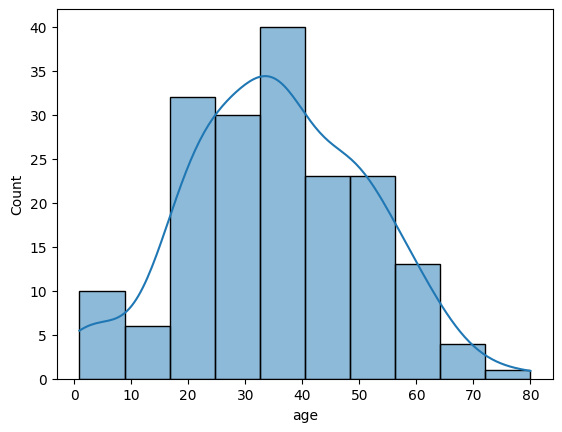

In [19]:
#imputation missing values
#MEAN VALUE IMPUTATION
#replace missing values by mean of the specific column
# it works well when we have a normally distributed data

sns.histplot(df["age"], kde = True)

In [20]:
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [21]:
df[['age_mean', 'age']]

,age_mean,age
1,38.0,38.0
3,35.0,35.0
6,54.0,54.0
10,4.0,4.0
11,58.0,58.0
...,...,...
871,47.0,47.0
872,33.0,33.0
879,56.0,56.0
887,19.0,19.0


In [22]:
# 2. Median Value Imputation
df['age_median'] = df['age'].fillna(df['age'].median())

In [24]:
df[['age_median', 'age_mean', 'age']]

,age_median,age_mean,age
1,38.0,38.0,38.0
3,35.0,35.0,35.0
6,54.0,54.0,54.0
10,4.0,4.0,4.0
11,58.0,58.0,58.0
...,...,...,...
871,47.0,47.0,47.0
872,33.0,33.0,33.0
879,56.0,56.0,56.0
887,19.0,19.0,19.0


In [36]:
# 3. Mode IMPUTATION TECHNIQUE
# for categorical values as well

df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median,age_mean


In [38]:
df['embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [41]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [42]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [43]:
df[['embarked_mode', 'embarked']]

,embarked_mode,embarked
1,C,C
3,S,S
6,S,S
10,S,S
11,S,S
...,...,...
871,S,S
872,S,S
879,C,C
887,S,S


In [44]:
df['embarked_mode'].isnull().sum()

0

In [45]:
df['embarked'].isnull().sum()

0